LOAD DATASET

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [5]:
from google.colab import files
uploaded = files.upload()


Saving laptop_price.csv to laptop_price.csv


In [6]:
import os
print(os.listdir())


['.config', 'drive', 'laptop_price.csv', 'sample_data']


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Membaca file CSV dengan encoding ISO-8859-1
df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

print(df.head())

# Preprocessing untuk data kategorikal
label_encoder = LabelEncoder()
df['Cpu'] = label_encoder.fit_transform(df['Cpu'])
df['Gpu'] = label_encoder.fit_transform(df['Gpu'])
df['OpSys'] = label_encoder.fit_transform(df['OpSys'])
df['Memory'] = label_encoder.fit_transform(df['Memory'])

print(df.head())

   laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Pilih kolom fitur dan target
X = df[['Cpu', 'Ram', 'Gpu', 'Memory', 'OpSys']]
y = df['Price_euros']

In [10]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,65,8GB,4,58,8,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,63,8GB,2,51,8,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,74,8GB,16,53,4,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,85,16GB,29,9,8,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,67,8GB,16,59,8,1.37kg,1803.60


In [11]:
df.shape

(1303, 13)

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [14]:
# menghilangkan kolom yang tidak diperlukan
df.drop(columns=['laptop_ID'],inplace=True)


In [15]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,65,8GB,4,58,8,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,63,8GB,2,51,8,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,74,8GB,16,53,4,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,85,16GB,29,9,8,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,67,8GB,16,59,8,1.37kg,1803.60


In [16]:
# menghilangkan GB pada Ram & kg pada Weight
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [17]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,65,8,4,58,8,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,63,8,2,51,8,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,74,8,16,53,4,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,85,16,29,9,8,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,67,8,16,59,8,1.37,1803.60


DATA PREPROCESSING & DATA CLEANING

In [18]:
# convert tipe data pada kolom Ram menjadi int32 & Weight menjadi float32
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   int64  
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   int64  
 8   Gpu               1303 non-null   int64  
 9   OpSys             1303 non-null   int64  
 10  Weight            1303 non-null   float32
 11  Price_euros       1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(4), object(4)
memory usage: 112.1+ KB


In [20]:
# menghilangkan var yang tidak digunakan
df.drop(columns=['Product'],inplace=True)

EDA (Exploratory Data Analysis)

<ipython-input-21-d9565591d297>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

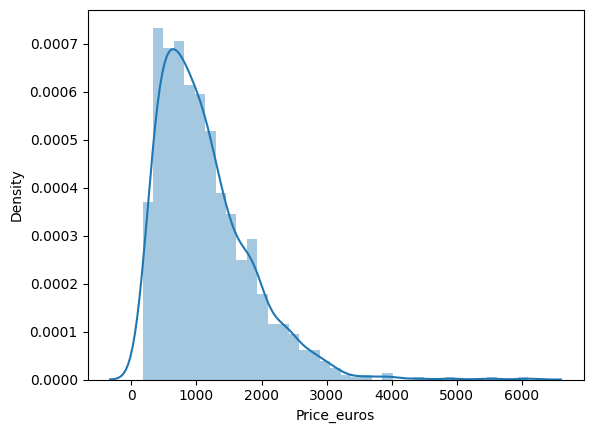

In [21]:
# Analisis var harga
sns.distplot(df['Price_euros'])

<Axes: xlabel='Company'>

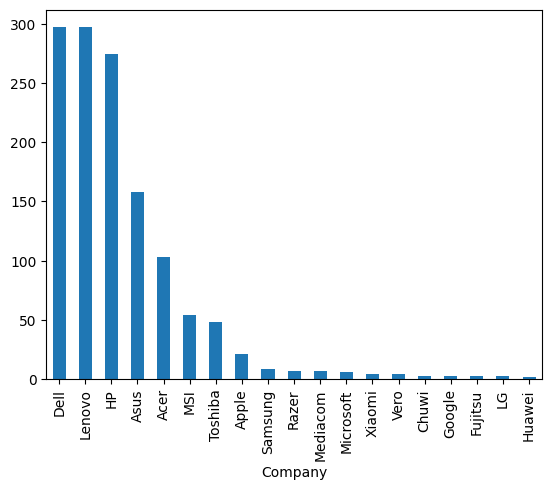

In [22]:
# Analisis var company
df['Company'].value_counts().plot(kind='bar')

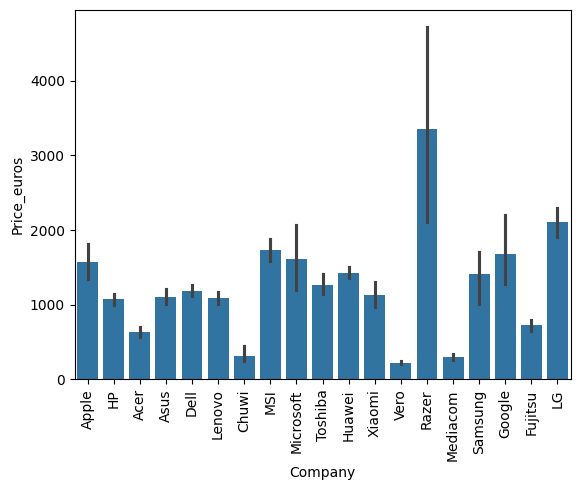

In [23]:
# Analisis tiap brand
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

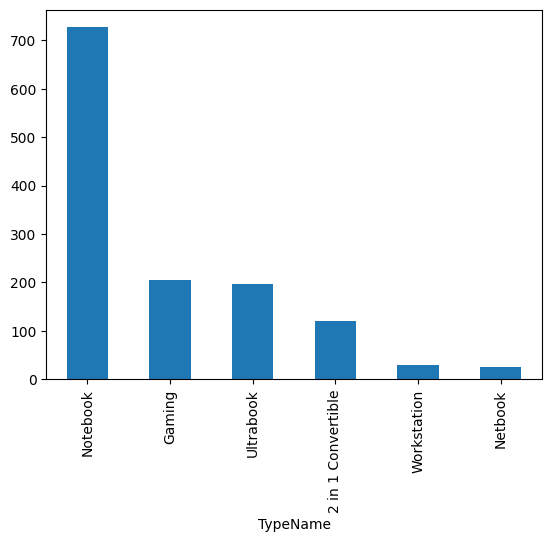

In [24]:
# Analisis var typename
df['TypeName'].value_counts().plot(kind='bar')

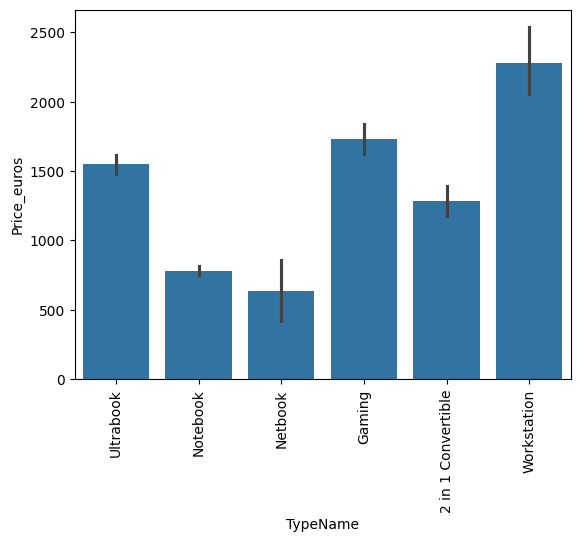

In [25]:
# nilai rata-rata dari setiap jenis laptop
sns.barplot(x=df['TypeName'], y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-26-51888cb550e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

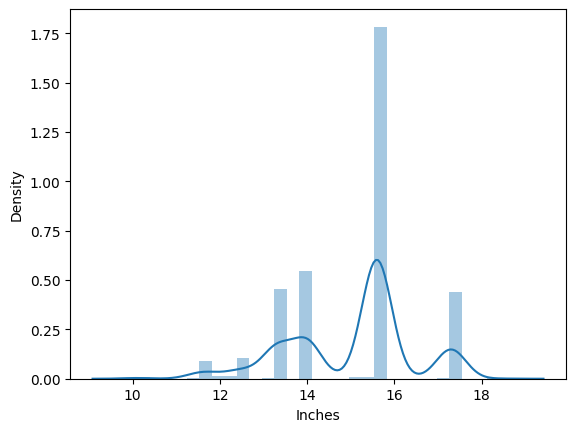

In [26]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price_euros'>

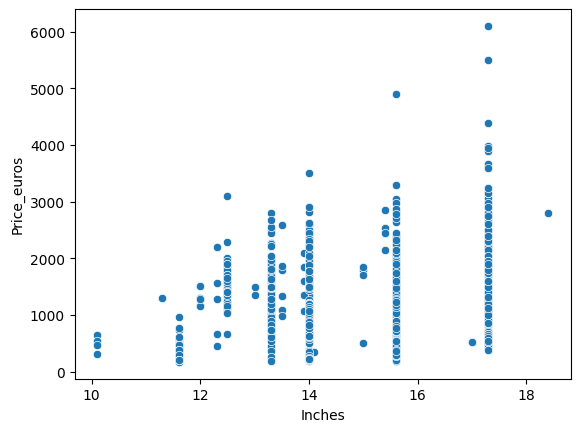

In [27]:
sns.scatterplot(x=df['Inches'], y=df['Price_euros'])

In [28]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [29]:
# kolom baru dengan informasi touchscreen
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
# menampilkan 5 data random
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
412,HP,Notebook,15.6,Full HD 1920x1080,56,4,10,6,5,2.10,469.0,0
259,Lenovo,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,102,8,29,77,5,2.00,1699.0,1
1174,Lenovo,Notebook,15.6,Full HD 1920x1080,97,8,10,72,4,2.20,709.0,0
854,Asus,Notebook,15.6,IPS Panel Full HD 1920x1080,97,8,16,83,5,2.30,787.0,0
455,Dell,2 in 1 Convertible,11.6,Touchscreen 1366x768,112,4,26,42,5,1.47,479.0,1


<Axes: xlabel='Touchscreen', ylabel='Price_euros'>

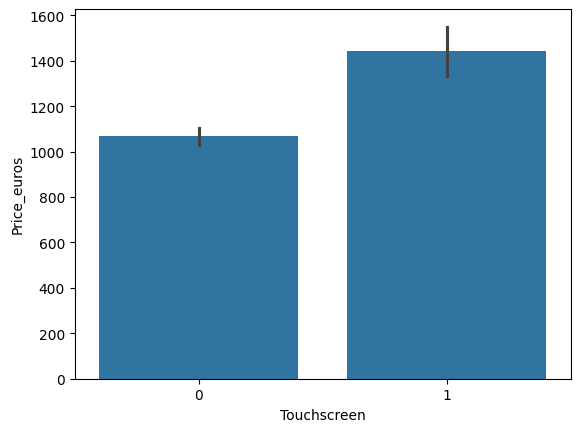

In [30]:
sns.barplot(x=df['Touchscreen'], y=df['Price_euros'])

In [31]:
# kolom baru dengan informasi IPS
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
# menampilkan 5 data sample
df.sample(5)


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips
825,Toshiba,Notebook,14.0,1366x768,108,4,4,45,5,1.75,499.0,0,0
609,Acer,Notebook,14.0,1366x768,112,4,2,42,5,1.60,349.0,0,0
231,HP,Notebook,15.6,1366x768,19,4,26,12,5,2.10,330.0,0,0
1217,Lenovo,Notebook,17.3,1600x900,74,8,10,53,4,2.80,539.0,0,0
680,MSI,Gaming,15.6,Full HD 1920x1080,77,8,16,75,5,2.20,997.9,0,0


<Axes: xlabel='Ips'>

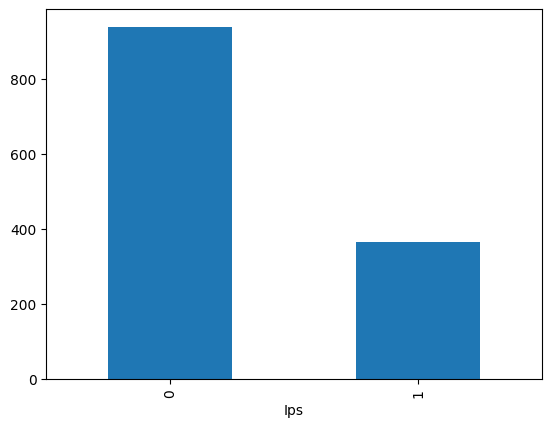

In [32]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price_euros'>

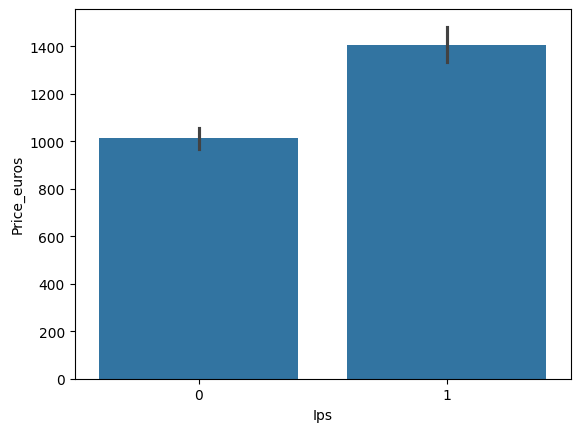

In [33]:
sns.barplot(x=df['Ips'], y=df['Price_euros'])
#laptop dengan IPS lebih mahal

In [34]:
# kolom baru untuk menampilkan Screen Resolution vertikal & horizontal
new = df['ScreenResolution'].str.split('x', n=1, expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res
788,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,102,16,18,79,5,4.20,2299.00,0,1,IPS Panel Full HD 1920,1080
325,Lenovo,Notebook,14.0,1366x768,37,4,23,43,5,1.44,292.00,0,0,1366,768
1145,HP,Workstation,15.6,Full HD 1920x1080,92,8,16,100,7,2.00,1899.00,0,0,Full HD 1920,1080
1269,Asus,Notebook,15.6,1366x768,89,4,26,65,5,2.20,720.32,0,0,1366,768
1027,HP,Notebook,14.0,1366x768,74,4,26,53,5,1.95,1060.00,0,0,1366,768


In [35]:
# membersihkan data kolom X_res
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'\d+\.?\d+').apply(lambda x:x[0])
df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,65,8,4,58,8,1.37,1339.69,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,63,8,2,51,8,1.34,898.94,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,74,8,16,53,4,1.86,575.00,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,85,16,29,9,8,1.83,2537.45,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,67,8,16,59,8,1.37,1803.60,0,1,2560,1600


In [36]:
# mengubah data type menjadi int
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   int64  
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   int64  
 7   Gpu               1303 non-null   int64  
 8   OpSys             1303 non-null   int64  
 9   Weight            1303 non-null   float32
 10  Price_euros       1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(8), object(3)
memory usage: 142.6+ KB


In [37]:
# Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Periksa apakah kolom 'Price_euros' ada
if 'Price_euros' in numeric_df.columns:
    # Hitung korelasi dengan kolom 'Price_euros'
    korelasi = numeric_df.corr()['Price_euros']
    print(korelasi)
else:
    print("'Price_euros' bukan kolom numerik.")


Inches         0.068197
Cpu            0.529334
Ram            0.743007
Memory         0.185680
Gpu            0.443299
OpSys          0.288911
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price_euros, dtype: float64


In [38]:
# Check the data types of the columns
print(df.dtypes)

# Convert non-numeric columns to numeric if necessary (e.g., using LabelEncoder for 'Apple', etc.)
from sklearn.preprocessing import LabelEncoder

# Example for encoding a categorical column 'Company' (which might have 'Apple' and other brands)
le = LabelEncoder()
df['Company_encoded'] = le.fit_transform(df['Company'])

# Recalculate correlation on numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns
correlation_matrix = df[numeric_cols].corr()

# Show the correlation with 'Price_euros'
print(correlation_matrix['Price_euros'])


Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                   int64
Ram                   int32
Memory                int64
Gpu                   int64
OpSys                 int64
Weight              float32
Price_euros         float64
Touchscreen           int64
Ips                   int64
X_res                 int64
Y_res                 int64
dtype: object
Inches             0.068197
Cpu                0.529334
Memory             0.185680
Gpu                0.443299
OpSys              0.288911
Price_euros        1.000000
Touchscreen        0.191226
Ips                0.252208
X_res              0.556529
Y_res              0.552809
Company_encoded    0.140371
Name: Price_euros, dtype: float64


In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Misalnya, gunakan df jika itu adalah dataframe yang sudah dibaca
df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

# Membersihkan data atau jika Anda memfilter dataframe, simpan ke df_clean
df_clean = df.copy()  # Salin df ke df_clean untuk menghindari perubahan langsung pada df asli

# Asumsi kolom 'Company' berisi nilai string seperti 'Apple', 'Dell', dll.
le = LabelEncoder()
df_clean['Company_encoded'] = le.fit_transform(df_clean['Company'])

# Pilih hanya kolom numerik untuk korelasi
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Hitung matriks korelasi untuk kolom numerik
correlation_matrix = df_clean[numeric_cols].corr()

# Periksa korelasi dengan 'Price_euros'
print(correlation_matrix['Price_euros'])


laptop_ID          0.067830
Inches             0.068197
Price_euros        1.000000
Company_encoded    0.140371
Name: Price_euros, dtype: float64


In [40]:
# Cek nama-nama kolom yang ada
print(df.columns)


Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')


In [41]:
# Periksa apakah kolom 'ScreenResolution' ada dalam DataFrame
if 'ScreenResolution' in df.columns:
    df.drop(columns=['ScreenResolution'], inplace=True)
else:
    print("'ScreenResolution' tidak ditemukan dalam DataFrame")


In [42]:
# Hapus kolom yang ada saja
columns_to_drop = ['Inches', 'X_res', 'Y_res']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
print(df.head())


   laptop_ID Company      Product   TypeName                         Cpu  \
0          1   Apple  MacBook Pro  Ultrabook        Intel Core i5 2.3GHz   
1          2   Apple  Macbook Air  Ultrabook        Intel Core i5 1.8GHz   
2          3      HP       250 G6   Notebook  Intel Core i5 7200U 2.5GHz   
3          4   Apple  MacBook Pro  Ultrabook        Intel Core i7 2.7GHz   
4          5   Apple  MacBook Pro  Ultrabook        Intel Core i5 3.1GHz   

    Ram               Memory                           Gpu  OpSys  Weight  \
0   8GB            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1   8GB  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2   8GB            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3  16GB            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4   8GB            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  
3      2537.

In [43]:
# Cek tipe data kolom 'Cpu'
print(df['Cpu'].dtype)

# Tambahkan kolom 'Cpu Name' dengan memastikan nilai 'Cpu' berupa string
df['Cpu Name'] = df['Cpu'].apply(lambda x: " ".join(str(x).split()[0:3]))


object


In [44]:
# Tambahkan kolom 'Cpu Name' dengan memastikan nilai 'Cpu' adalah string
df['Cpu Name'] = df['Cpu'].apply(lambda x: " ".join(str(x).split()[0:3]))

# Tambahkan kolom 'Cpu Name' dengan pengecekan tipe data
df['Cpu Name'] = df['Cpu'].apply(lambda x: " ".join(str(x).split()[0:3]) if isinstance(x, str) else str(x))


In [45]:
# Menampilkan semua nama kolom dalam dataframe
print(df.columns)


Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Cpu', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight', 'Price_euros', 'Cpu Name'],
      dtype='object')


In [46]:
# Drop columns only if they exist
columns_to_drop = ['Inches', 'X_res', 'Y_res']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Check the first few rows to confirm
df.head()


,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu Name
0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel Core i5
2,3,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel Core i7
4,5,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel Core i5


In [47]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M3-6Y30 0.9GHz,1
AMD A9-Series 9420 2.9GHz,1
Intel Core i3 6006U 2.2GHz,1


In [48]:
# memilah jenis processor laptop
def fetch_processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  else:
    if text.split()[0] == 'Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'

df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)
df.head()


,laptop_ID,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu Name,Cpu Brand
0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel Core i5,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel Core i5,Intel Core i5
2,3,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel Core i5,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel Core i7,Intel Core i7
4,5,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel Core i5,Intel Core i5


In [49]:
# Periksa jumlah kemunculan setiap nilai dalam kolom 'Cpu Brand'
print(df['Cpu Brand'].value_counts())


Cpu Brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64


<Axes: xlabel='Cpu Brand'>

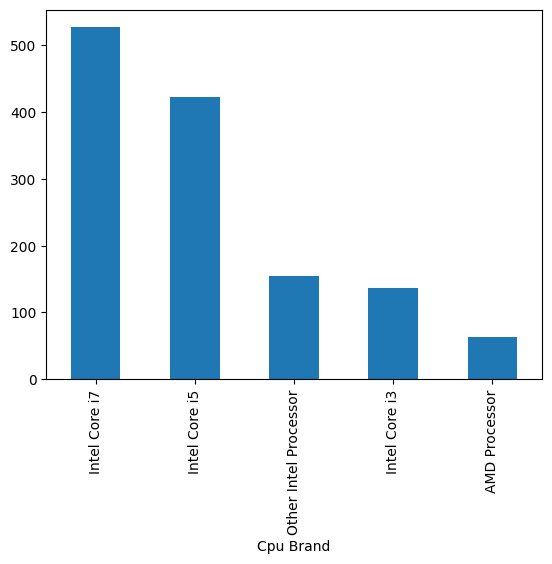

In [50]:
df['Cpu Brand'].value_counts().plot(kind='bar')

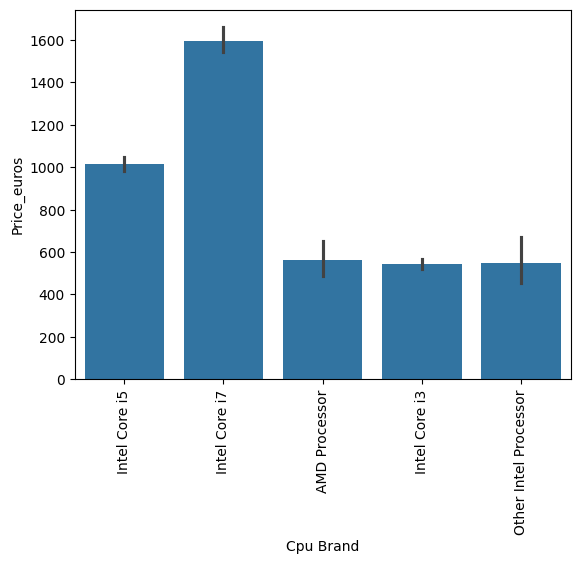

In [51]:

sns.barplot(x=df['Cpu Brand'], y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
# menghapus colom Cpu dan Cpu Name
df.drop(columns=['Cpu', 'Cpu Name'], inplace=True)
df.head()

,laptop_ID,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu Brand
0,1,Apple,MacBook Pro,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel Core i5
2,3,HP,250 G6,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel Core i5
3,4,Apple,MacBook Pro,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel Core i7
4,5,Apple,MacBook Pro,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel Core i5


<Axes: xlabel='Ram'>

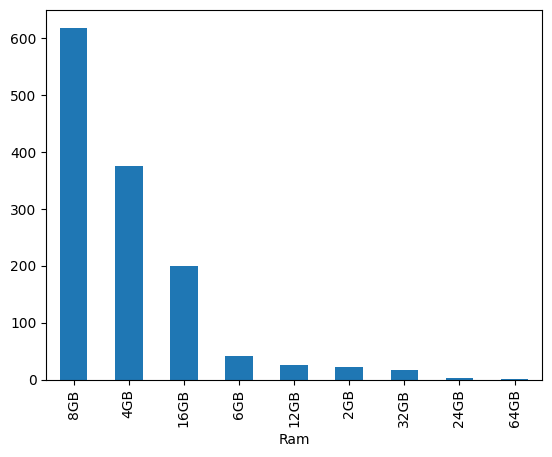

In [53]:

df['Ram'].value_counts().plot(kind='bar')

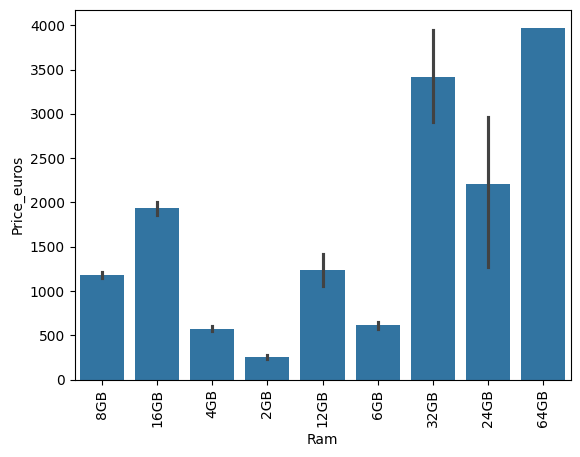

In [54]:
sns.barplot(x=df['Ram'], y=df['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

In [55]:

df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [56]:
print(df.columns)


Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Ram', 'Memory', 'Gpu',
       'OpSys', 'Weight', 'Price_euros', 'Cpu Brand'],
      dtype='object')


In [57]:
new = df["Memory"].str.split("+", n=1, expand=True)
print(new.head())


                     0     1
0            128GB SSD  None
1  128GB Flash Storage  None
2            256GB SSD  None
3            512GB SSD  None
4            256GB SSD  None


In [58]:
# Menampilkan semua nama kolom dalam dataframe
print(df.columns)


Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Ram', 'Memory', 'Gpu',
       'OpSys', 'Weight', 'Price_euros', 'Cpu Brand'],
      dtype='object')


In [59]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encoding kolom Ram dan Memory
df['Ram_encoded'] = label_encoder.fit_transform(df['Ram'])
df['Memory_encoded'] = label_encoder.fit_transform(df['Memory'])

# Tampilkan hasil
print(df[['Ram', 'Ram_encoded', 'Memory', 'Memory_encoded']].head())


    Ram  Ram_encoded               Memory  Memory_encoded
0   8GB            8            128GB SSD               4
1   8GB            8  128GB Flash Storage               2
2   8GB            8            256GB SSD              16
3  16GB            1            512GB SSD              29
4   8GB            8            256GB SSD              16


In [60]:
#menghapus kolom memory
df.drop(columns=['Memory'], inplace=True)
df.head()


,laptop_ID,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Cpu Brand,Ram_encoded,Memory_encoded
0,1,Apple,MacBook Pro,Ultrabook,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Intel Core i5,8,4
1,2,Apple,Macbook Air,Ultrabook,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,Intel Core i5,8,2
2,3,HP,250 G6,Notebook,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,Intel Core i5,8,16
3,4,Apple,MacBook Pro,Ultrabook,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Intel Core i7,1,29
4,5,Apple,MacBook Pro,Ultrabook,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Intel Core i5,8,16


In [61]:
from sklearn.preprocessing import LabelEncoder

# Menggunakan LabelEncoder untuk kolom 'Cpu Brand'
encoder = LabelEncoder()
df['Cpu Brand'] = encoder.fit_transform(df['Cpu Brand'])

# Sekarang kita dapat menghitung korelasi
numerical_df = df.select_dtypes(include=['number'])
correlation = numerical_df.corr()['Price_euros']

print(correlation)


laptop_ID         0.067830
Price_euros       1.000000
Cpu Brand         0.246240
Ram_encoded      -0.254032
Memory_encoded    0.185680
Name: Price_euros, dtype: float64


In [62]:
# Hapus kolom jika ada
cols_to_drop = ['Hybrid', 'Flash_Storage']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# Tampilkan data setelah penghapusan
df.head()


,laptop_ID,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Cpu Brand,Ram_encoded,Memory_encoded
0,1,Apple,MacBook Pro,Ultrabook,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2,8,4
1,2,Apple,Macbook Air,Ultrabook,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,2,8,2
2,3,HP,250 G6,Notebook,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,2,8,16
3,4,Apple,MacBook Pro,Ultrabook,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,3,1,29
4,5,Apple,MacBook Pro,Ultrabook,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2,8,16


In [63]:
df['Gpu'].value_counts()


,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [64]:
# Pastikan kolom Gpu adalah tipe string
df['Gpu Brand'] = df['Gpu'].astype(str).apply(lambda x: x.split()[0])
df.head()



,laptop_ID,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Cpu Brand,Ram_encoded,Memory_encoded,Gpu Brand
0,1,Apple,MacBook Pro,Ultrabook,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2,8,4,Intel
1,2,Apple,Macbook Air,Ultrabook,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,2,8,2,Intel
2,3,HP,250 G6,Notebook,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,2,8,16,Intel
3,4,Apple,MacBook Pro,Ultrabook,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,3,1,29,AMD
4,5,Apple,MacBook Pro,Ultrabook,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2,8,16,Intel


In [65]:
df['Gpu Brand'].value_counts()

,count
Gpu Brand,
Intel,722
Nvidia,400
AMD,180
ARM,1


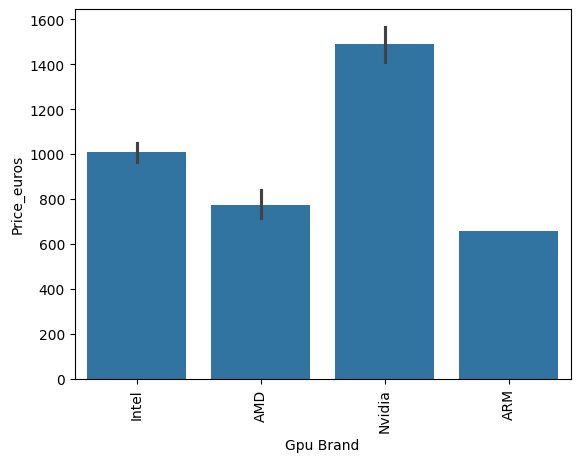

In [66]:
sns.barplot(x = df['Gpu Brand'], y = df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()


In [67]:
# menghapus kolom Gpu
df.drop(columns=['Gpu'], inplace=True)
df.head()


,laptop_ID,Company,Product,TypeName,Ram,OpSys,Weight,Price_euros,Cpu Brand,Ram_encoded,Memory_encoded,Gpu Brand
0,1,Apple,MacBook Pro,Ultrabook,8GB,macOS,1.37kg,1339.69,2,8,4,Intel
1,2,Apple,Macbook Air,Ultrabook,8GB,macOS,1.34kg,898.94,2,8,2,Intel
2,3,HP,250 G6,Notebook,8GB,No OS,1.86kg,575.00,2,8,16,Intel
3,4,Apple,MacBook Pro,Ultrabook,16GB,macOS,1.83kg,2537.45,3,1,29,AMD
4,5,Apple,MacBook Pro,Ultrabook,8GB,macOS,1.37kg,1803.60,2,8,16,Intel


In [68]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


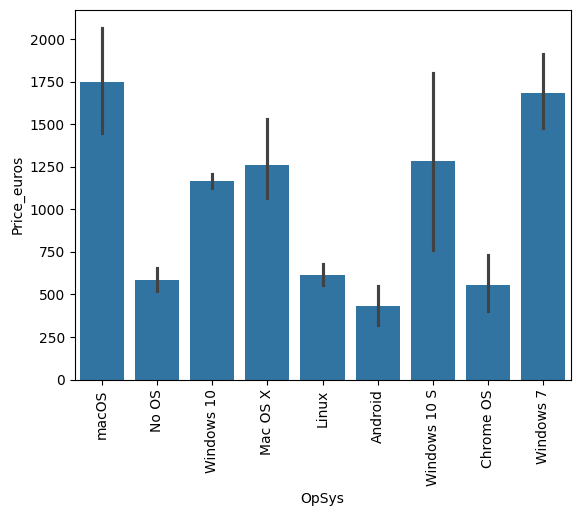

In [69]:
sns.barplot(x = df['OpSys'], y = df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [70]:
# Memilah jenis OS
def cat_os(inp) :
  if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
    return 'Windows'
  elif inp == 'macOS' or inp == 'Mac OS X' :
    return 'Mac'
  else:
    return 'Others/NO OS/Linux'

df['os'] = df['OpSys'].apply(cat_os)
df.head()


,laptop_ID,Company,Product,TypeName,Ram,OpSys,Weight,Price_euros,Cpu Brand,Ram_encoded,Memory_encoded,Gpu Brand,os
0,1,Apple,MacBook Pro,Ultrabook,8GB,macOS,1.37kg,1339.69,2,8,4,Intel,Mac
1,2,Apple,Macbook Air,Ultrabook,8GB,macOS,1.34kg,898.94,2,8,2,Intel,Mac
2,3,HP,250 G6,Notebook,8GB,No OS,1.86kg,575.00,2,8,16,Intel,Others/NO OS/Linux
3,4,Apple,MacBook Pro,Ultrabook,16GB,macOS,1.83kg,2537.45,3,1,29,AMD,Mac
4,5,Apple,MacBook Pro,Ultrabook,8GB,macOS,1.37kg,1803.60,2,8,16,Intel,Mac


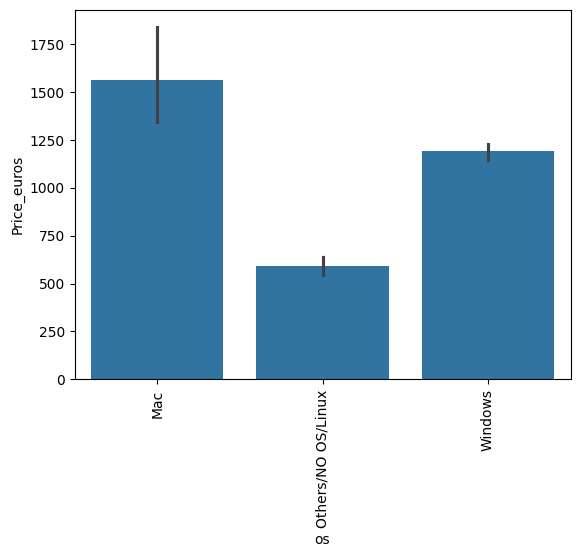

In [71]:
# Menghapus kolom Gpu
df.drop(columns=['OpSys'], inplace=True)

#Menampilkan barplot operation system terhadap harga laptop
sns.barplot(x = df['os'], y = df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [72]:
df.head()

,laptop_ID,Company,Product,TypeName,Ram,Weight,Price_euros,Cpu Brand,Ram_encoded,Memory_encoded,Gpu Brand,os
0,1,Apple,MacBook Pro,Ultrabook,8GB,1.37kg,1339.69,2,8,4,Intel,Mac
1,2,Apple,Macbook Air,Ultrabook,8GB,1.34kg,898.94,2,8,2,Intel,Mac
2,3,HP,250 G6,Notebook,8GB,1.86kg,575.00,2,8,16,Intel,Others/NO OS/Linux
3,4,Apple,MacBook Pro,Ultrabook,16GB,1.83kg,2537.45,3,1,29,AMD,Mac
4,5,Apple,MacBook Pro,Ultrabook,8GB,1.37kg,1803.60,2,8,16,Intel,Mac


<ipython-input-73-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


ValueError: could not convert string to float: '1.37kg'

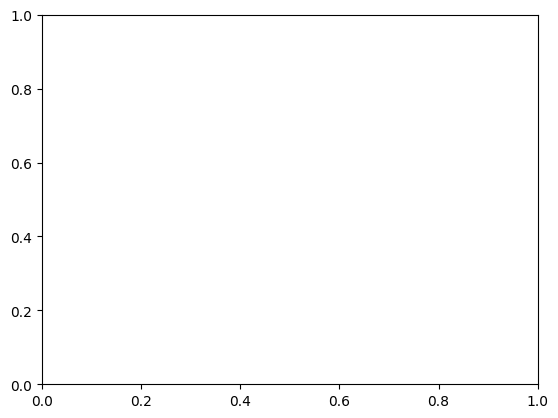

In [73]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price_euros'>

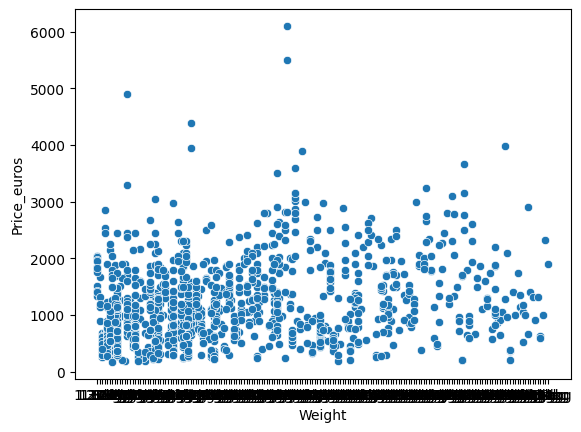

In [74]:
sns.scatterplot(x = df['Weight'], y = df['Price_euros'])

In [75]:
# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['number'])

# Hitung korelasi terhadap harga (Price_euros)
correlation = df_numeric.corr()['Price_euros']

# Tampilkan hasil korelasi
print(correlation)


laptop_ID         0.067830
Price_euros       1.000000
Cpu Brand         0.246240
Ram_encoded      -0.254032
Memory_encoded    0.185680
Name: Price_euros, dtype: float64


<Axes: >

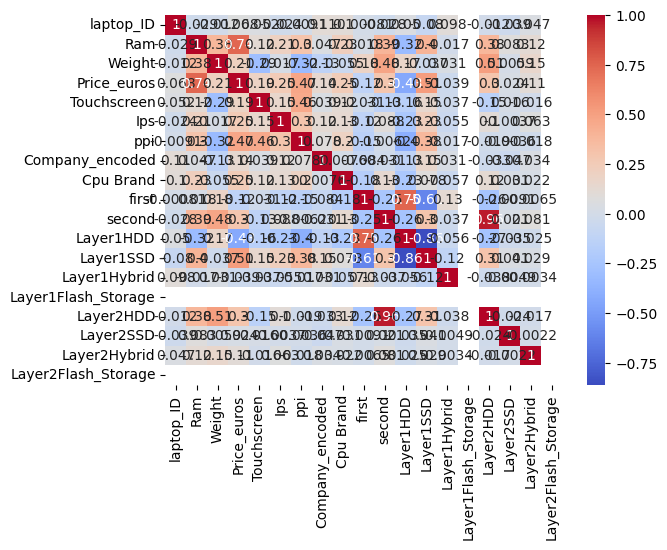

In [ ]:
# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['number'])

# Buat heatmap korelasi
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')


<Axes: >

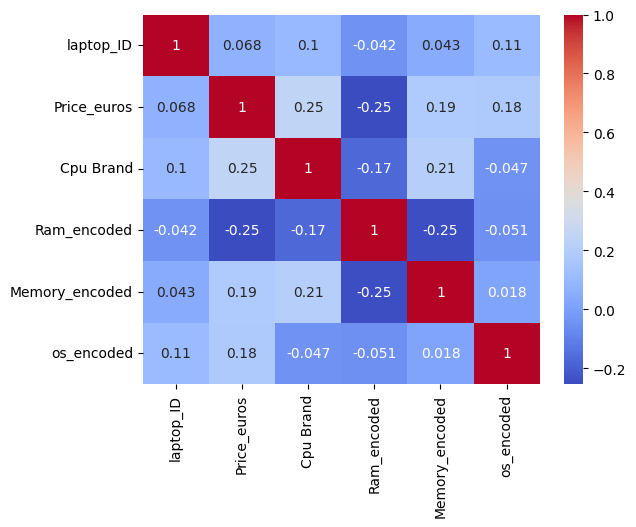

In [77]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Ubah kolom 'os' menjadi numerik
df['os_encoded'] = le.fit_transform(df['os'])

# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['number'])

# Buat heatmap korelasi
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')


<ipython-input-78-7250b54c5333>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price_euros']))


<Axes: xlabel='Price_euros', ylabel='Density'>

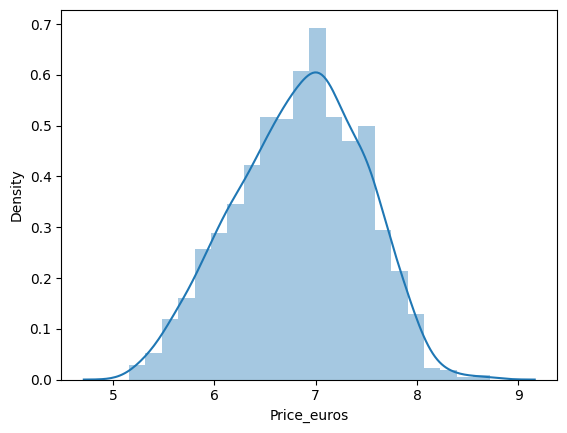

In [78]:
sns.distplot(np.log(df['Price_euros']))

In [79]:

# Menghapus kolom harga
X = df.drop(columns=['Price_euros'])
y = np.log(df['Price_euros'])
X

,laptop_ID,Company,Product,TypeName,Ram,Weight,Cpu Brand,Ram_encoded,Memory_encoded,Gpu Brand,os,os_encoded
0,1,Apple,MacBook Pro,Ultrabook,8GB,1.37kg,2,8,4,Intel,Mac,0
1,2,Apple,Macbook Air,Ultrabook,8GB,1.34kg,2,8,2,Intel,Mac,0
2,3,HP,250 G6,Notebook,8GB,1.86kg,2,8,16,Intel,Others/NO OS/Linux,1
3,4,Apple,MacBook Pro,Ultrabook,16GB,1.83kg,3,1,29,AMD,Mac,0
4,5,Apple,MacBook Pro,Ultrabook,8GB,1.37kg,2,8,16,Intel,Mac,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,4GB,1.8kg,3,5,4,Intel,Windows,2
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,16GB,1.3kg,3,1,29,Intel,Windows,2
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,2GB,1.5kg,4,3,35,Intel,Windows,2
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,6GB,2.19kg,3,7,10,AMD,Windows,2


In [80]:
y

,Price_euros
0,7.200194
1,6.801216
2,6.354370
3,7.838915
4,7.497540
...,...
1298,6.458338
1299,7.312553
1300,5.433722
1301,6.638568


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=2)

X_train


,laptop_ID,Company,Product,TypeName,Ram,Weight,Cpu Brand,Ram_encoded,Memory_encoded,Gpu Brand,os,os_encoded
183,187,Toshiba,Satellite Pro,Notebook,8GB,2.0kg,2,8,4,Intel,Windows,2
699,707,HP,15-bs011nv (i7-7500U/4GB/500GB/Radeon,Notebook,4GB,2.1kg,3,5,26,AMD,Windows,2
419,426,Lenovo,ThinkPad E480,Ultrabook,8GB,1.75kg,3,8,16,AMD,Windows,2
997,1011,Acer,Aspire ES1-533,Notebook,4GB,2.4kg,4,5,26,Intel,Windows,2
502,509,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,8GB,1.4kg,2,8,16,Intel,Windows,2
...,...,...,...,...,...,...,...,...,...,...,...,...
466,473,Acer,Aspire 5,Notebook,4GB,2.2kg,1,5,26,Nvidia,Windows,2
299,304,Asus,ZenBook UX530UQ-PRO,Ultrabook,16GB,1.63kg,3,1,29,Nvidia,Windows,2
493,500,Acer,Aspire 5,Notebook,8GB,2.2kg,0,8,10,AMD,Windows,2
527,534,Lenovo,IdeaPad 320-15ISK,Notebook,8GB,2.2kg,1,8,22,Nvidia,Others/NO OS/Linux,1



EVALUASI DAN TRAINING MODEL DENGAN REGRESI LINEAR

In [84]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Membaca file CSV
df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

# Menyiapkan df_clean, misalnya dengan menghapus baris yang memiliki nilai kosong
df_clean = df.dropna(subset=['Company'])  # Hapus baris jika kolom 'Company' kosong

# Melakukan Label Encoding pada kolom 'Company'
le = LabelEncoder()
df_clean['Company_encoded'] = le.fit_transform(df_clean['Company'])

# Pilih kolom numerik untuk korelasi
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Hitung korelasi matriks untuk kolom numerik
correlation_matrix = df_clean[numeric_cols].corr()

# Cek korelasi dengan 'Price_euros'
print(correlation_matrix['Price_euros'])


laptop_ID          0.067830
Inches             0.068197
Price_euros        1.000000
Company_encoded    0.140371
Name: Price_euros, dtype: float64


In [85]:
# Export model
import pickle

pickle.dump(df,open('df.pkl', 'wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [86]:
X_train

,laptop_ID,Company,Product,TypeName,Ram,Weight,Cpu Brand,Ram_encoded,Memory_encoded,Gpu Brand,os,os_encoded
183,187,Toshiba,Satellite Pro,Notebook,8GB,2.0kg,2,8,4,Intel,Windows,2
699,707,HP,15-bs011nv (i7-7500U/4GB/500GB/Radeon,Notebook,4GB,2.1kg,3,5,26,AMD,Windows,2
419,426,Lenovo,ThinkPad E480,Ultrabook,8GB,1.75kg,3,8,16,AMD,Windows,2
997,1011,Acer,Aspire ES1-533,Notebook,4GB,2.4kg,4,5,26,Intel,Windows,2
502,509,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,8GB,1.4kg,2,8,16,Intel,Windows,2
...,...,...,...,...,...,...,...,...,...,...,...,...
466,473,Acer,Aspire 5,Notebook,4GB,2.2kg,1,5,26,Nvidia,Windows,2
299,304,Asus,ZenBook UX530UQ-PRO,Ultrabook,16GB,1.63kg,3,1,29,Nvidia,Windows,2
493,500,Acer,Aspire 5,Notebook,8GB,2.2kg,0,8,10,AMD,Windows,2
527,534,Lenovo,IdeaPad 320-15ISK,Notebook,8GB,2.2kg,1,8,22,Nvidia,Others/NO OS/Linux,1


In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error  # Tambahkan import ini

# Membuat dataset untuk regresi linear dengan 6 fitur
X, y = make_regression(n_samples=100, n_features=6, noise=0.1)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  # Menghitung Mean Squared Error
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.008381269168559547


In [96]:
import pickle

# Menyimpan model ke file .sav menggunakan pickle
with open('model.sav', 'wb') as file:
    pickle.dump(model, file)

print("Model telah disimpan sebagai model.sav")


Model telah disimpan sebagai model.sav


In [97]:
from google.colab import files

# Mengunduh file model.sav ke komputer lokal Anda
files.download('model.sav')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
print(model.coef_)  # Untuk melihat koefisien dan memahami fitur apa yang digunakan


[23.36746481 61.7717055  88.8816955  91.0785086  82.49456637 97.27542093]


In [99]:
# Melihat nama fitur dan koefisien untuk setiap fitur
features = ['Product', 'Cpu', 'Gpu', 'OpSys', 'Ram', 'Memory']  # Gantilah dengan nama fitur yang sesuai
print("Fitur yang digunakan dalam model:")
for feature, coef in zip(features, model.coef_):
    print(f"Fitur: {feature}, Koefisien: {coef}")


Fitur yang digunakan dalam model:
Fitur: Product, Koefisien: 23.367464809063225
Fitur: Cpu, Koefisien: 61.771705504986485
Fitur: Gpu, Koefisien: 88.88169550306844
Fitur: OpSys, Koefisien: 91.07850860263044
Fitur: Ram, Koefisien: 82.49456636525667
Fitur: Memory, Koefisien: 97.27542092912579


In [100]:
import statsmodels.api as sm

# Menambahkan intercept (bias) ke dalam dataset (X) untuk model statsmodels
X_train_sm = sm.add_constant(X_train)

# Membuat dan melatih model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Menampilkan ringkasan model
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.112e+07
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          1.27e-239
Time:                        03:24:04   Log-Likelihood:                 81.011
No. Observations:                  80   AIC:                            -148.0
Df Residuals:                      73   BIC:                            -131.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0092      0.011      0.848      0.3